# **Computer Infrastructure Assessment Notebook**

This notebook contains my reports for each of the tasks included in the Computer Infrastructure module.

`Code blocks` are used wherever code is referenced.

***
## Task 1: Create Directory Structure

In this first task I created two subdirectories (timestamps and weather) within a directory (data) placed at the root (the first point, or the point at which you couldn't `cd ..` and still be in the directory) of my repository.

I did this as a command line prompt in GitHub codespaces. Codespaces is a cloud based development environment acessible on GitHub via the repository home page. Codespaces runs Visual Studio code on the users browser. This is where the majority of the work for this assessment was completed.

`mkdir` (make directory) is the command that is useful for us here. `mkdir` creates a directory (a folder) within the present working directory.

`mkdir data/weather` creates a folder called weather in a folder called data.

I used `ls` when in the data directory to check the two new folders were present.


***
## Task 2: Timestamps

For the second task, I navigated to the timestamps directory and used the `date` Linux command to display the system date in a text file called now.txt.

This was done with the following command: `date >> now.txt`.

I copied and pasted this command 10 times which saved 10 instances of date to the text file.

`>>` appends a file, so each time I ran the command a new line was added.

By default, `date` is displayed "Day-of-week Month Day-of-Month Hour:Minute:Second Timezone Year" (`Man date` explains this in more detail, as the `man` (manual) does with all of the commands I will mention).

In the next task I format the date myself.

***
## Task 3: Formatting Timestamps

For the third task I used `date` once again. However, this time I formatted the output to one of my own choosing.

The command this time was `date +"%Y/%m/%d %H:%M:%S" >> formatted.txt`.

This saved as Year/Month/Day Hour/Minute/Second: 2024/11/08 17:05:31

Again, I used `>>` here to append into a new file, this time to a new text file called formatted.txt.

***
## Task 4: Create Timestamped Files

The next task is to create a timestamped file.

I did this by using the `touch` command. `touch` changes the timestamps of existing files or creates new files if no file already exists with the file name given.

In backticks I used the `date` command again along with my desired format- note this time there is no '/' or ':' included as these punctuation marks are not suitable for using in filenames.

``` touch `date +%Y%m%d_%H%M%S`.txt ```

This created an empty folder with a timestamped date and time.

***
## Task 5: Download Today's Weather Data

In task 5 we bring in some live weather data from an API. Here, I was tasked with pulling the latest weather to a new file in the weather folder.

To do this I used the `wget` (world wide web get) command to pull from a URL. My command in full was:

``` wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today ```

`-O` let's me save the file to a name of my own choosing (weather.json)

The URL here points to Met Eireann's server and the file path to follow in requesting the latest weather data for Athenry.

***
## Task 6: Timestamp the Data

Task 6 required the same output as task 5 but this time the command was to be modified so that the saved file was in YYYYmmdd_HHMMSS format.

As we know from task 4 we can create timestamped files using the `date` command along with backticks and our desired format for the date and time.

As such, our modified command becomes: ``` wget -O `date +%Y%m%d_%H%M%S`.json https://prodapi.metweb.ie/observations/athenry/today ```.

This lays the foundation for a script to be created to automate the process of pulling weather data from Met Eireann and saving it as a timestamped file. In task 7 we will do just that.

***
## Task 7: Write the Script

In Visual Studio Code, I created a new file named weather.sh at the root of my repository.

In this new file I added a shebang `#! /bin/bash` (the shebang is a Linux convention that indicates how the script should be run- in this case I have indicated that the script should run as a command line argument to /bin/bash). Then, in the line below, I pasted in my command from task 6 (with the addition of the data/weather location for new files to be saved). This read as follows:

```
#! /bin/bash

wget -O "data/weather/$(date +%Y%m%d_%H%M%S).json" https://prodapi.metweb.ie/observations/athenry/today 
```

To test the script I first had to make it executable with the command `chmod u+x ./weather.sh` (change mode; user should be allowed to execute weather.sh script). Once this had been done I was able to read, write and execute (as opposed to just read and write). To check that this was set up correctly I navigated to the root of my directory (where the file sits) and used the `ls -l` command which shows permisions, file size and other useful metadata. 

Once I was happy the permissions had changed all that was left to do was to execute the script. To do so I ran the command `./weather.sh`. I knew it executed correctly as a new timestamped file was added to my weather folder. The project component of this module is to utilise the weather.sh script created in this task as a workflow which runs daily. 

***

## Task 9: Pandas

In this final task I will be analysing the data contained in the Athenry weather JSON files using the pandas module. I will begin by importing my libraries: pandas and matplotlib.

Pandas is used for the DataFrame data structure (a two-dimensional data structure with rows and columns, like a spreadsheet). It allows us to investigate JSON files, among other features.

Matplotlib is a plotting library. Pyplot allows for interactive plots and programmatic plot generation.

In [25]:
# Data Frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

Now let's read in one of the weather files using pandas and print the first few rows of data:

In [26]:
# Reading in the dataset
df1216 = pd.read_json('data/weather/20241216_142943.json')

# First rows
df1216.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,10,04n,Cloudy,"""Cloudy""",15,-,SW,225,83,0.0,1028,Monday,2024-12-16,00:00
1,Athenry,10,04n,Cloudy,"""Cloudy""",15,-,SW,225,81,0.0,1028,Monday,2024-12-16,01:00
2,Athenry,11,04n,Cloudy,"""Cloudy""",19,-,SW,225,81,0.0,1028,Monday,2024-12-16,02:00
3,Athenry,11,04n,Cloudy,"""Cloudy""",20,-,W,270,80,0.0,1027,Monday,2024-12-16,03:00
4,Athenry,10,04n,Cloudy,"""Cloudy""",15,39,SW,225,90,0.0,1027,Monday,2024-12-16,04:00


As outlined by [data.gov.ie](https://data.gov.ie/dataset/todays-weather-athenry), our weather data contains a range of variables outlining the weather conditions in Athenry on any given day. In our case it is the day our script pulled from Met Eireanns API. We can see figures for windspeed, direction and gust; humidity and rainfall as well as temperature and pressure among other variables. In this example, we're seeing the weather conditions on the 16th of December 2024. Unsurprisingly for Ireland, the weather is looking cloudy...

Let's take a look at some summary statistics for the numerical data included in the dataset:

In [27]:
# Summary statistics
print(df1216[['temperature', 'windSpeed', 'humidity', 'pressure']].describe())

       temperature  windSpeed   humidity     pressure
count    15.000000  15.000000  15.000000    15.000000
mean     10.800000  19.133333  85.000000  1026.866667
std       0.414039   3.419830   3.047247     0.743223
min      10.000000  13.000000  80.000000  1026.000000
25%      11.000000  17.000000  82.500000  1026.000000
50%      11.000000  20.000000  85.000000  1027.000000
75%      11.000000  21.000000  87.000000  1027.000000
max      11.000000  26.000000  90.000000  1028.000000


Upon inspection of the above table it led me to believe this dataset was not representative of the entire day. What gives this away is the very low diurnal temperature range (1 degree between min and max), or, the range in temperature over a time period- in this case what should be one day.

Diurnal temperature ranges do not typically get this low, although cloudy locations such as Ireland do have relatively lower ranges as the effects of sunlight are reduced (the lowest ranges tend to be where sunlight is consistent- equatorial regions, and highest in high desert regions where the temperature swings severely between day and night). We would expect a few degrees difference between day and night on a given day in Athenry, or anywhere in Ireland, or Europe for that matter. To check, let's pull in the next two days reports and check the 'Report Time' columns:

In [28]:
# Loading in the next two days as seperate dataframes
df1217 = pd.read_json('data/weather/20241217_151313.json')
df1218 = pd.read_json('data/weather/20241218_111805.json')

# Printing the report times available in each dataset
print(df1216['reportTime'].tolist())
print(df1217['reportTime'].tolist())
print(df1218['reportTime'].tolist())

['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00']
['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00']
['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00']


Evidently, we are not getting the full picture with our datasets as when we pull from the API we get the data up to the latest hour. So, when I manually pulled the weather data on the 16th and 17th of December I did so between 2PM and 3PM (we timestamped our files, so I can see exactly when I made the request with the API, 3:13 PM). Then, the automated workflow ran after 11AM. Ideally, we would set the workflow to run at 23:00 so that we get the max amount of data per day.

Regardless of the cut off, we can still produce some plots to analyse the data available. Let's stick with the report from the 16th and utilise matplotlib to visualise the data. Here, we will check out how wind speed differs over the course of 14 hours on this day:

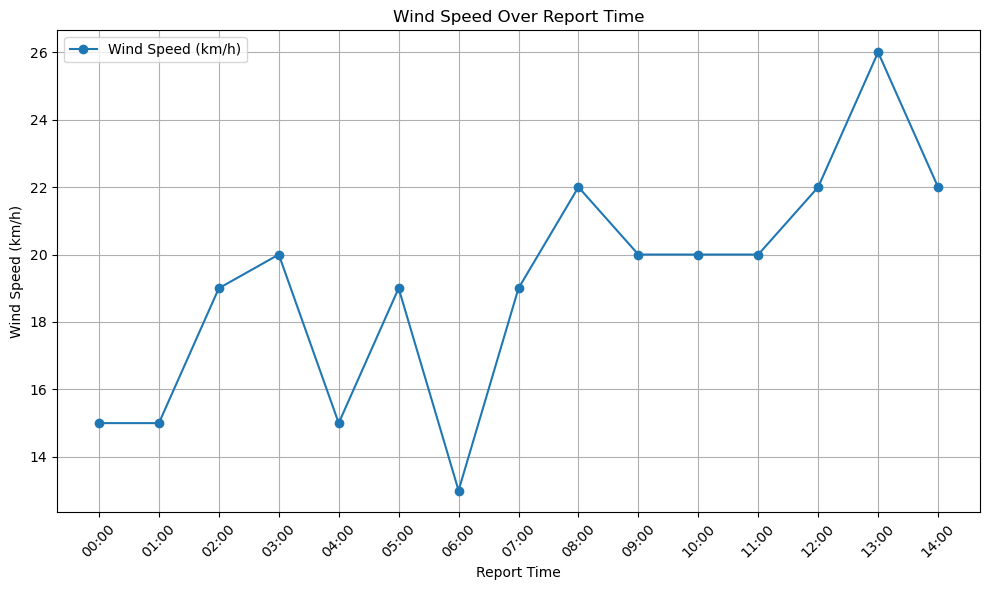

In [29]:
# Wind Speed over Time
plt.figure(figsize=(10, 6))
plt.plot(df1216['reportTime'], df1216['windSpeed'], marker='o', label='Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.xlabel('Report Time')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed Over Report Time')
plt.grid(True)
plt.tight_layout()
plt.legend()

This is scratching the surface of what we can do with pandas to analyse our weather data. This analysis becomes even more interesting once we build up more data, which is what the workflow is doing daily. If we were to combine the datasets together we could produce some really valuable insights.

Earlier, I alluded to the diurnal temperature range. Tracking this is essential for winemakers for instance. A successful grape harvest is dependent upon precise temperature ranges between day and night. These impact grape ripening and tannin development- therefore they are a key variable behind the flavour profile of the vineyard's end product.

Data analysts, who would routinely use the tools demonstrated in this notebook, would be employed in vineyards to consistently monitor factors such as these. This is just one small example of the practical uses of pandas in anlysing data. In this notebook we have seen how scripting, workflows and the command line interactions that are foundational to both, are used in attaining useful data to work with.

This concludes the tasks for the computer infrastructure module. Along with the tasks outlined here, I also completed the project component of the module; this involved creating a workflow to automate the running of the weather.sh script daily. This workflow is the YAML file located in the .github/workflows folder.

***

## References

| Author                                 | Title                                                                                                         | Blurb                           |
| :---                                   |    :----:                                                                                                     |          :---:                  |
| Data.Gov.ie | [ Today's Weather Athenry ](https://data.gov.ie/dataset/todays-weather-athenry) | Data.Gov.ie's info on the Athenry Weather observations. |
| Driscoll, Mike. Real Python         | [*Jupyter Notebook: An Introduction*](https://realpython.com/jupyter-notebook-introduction/)                  | A quick introduction to Jupyter Notebooks; how to create and manage them.     |
| GitHub Docs | [*Basic writing and formatting syntax: Create sophisticated formatting for your prose and code on GitHub with simple syntax*](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) | Guide for the basics of markdown; stylising text, making lists, adding images, etc. |
| GitHub Docs | [*GitHub Codespaces Overview*](https://docs.github.com/en/codespaces/overview) | GitHub's guide for Codespaces. |
| Met Eireann | [*Diurnal Temperature Range (DTR)* ](https://www.met.ie/cms/assets/uploads/2022/09/DTR.pdf) | I reference this term when I look into why one of my datasets has a 1 degree temperature range for the day (it doesn't really- the dataset is just incomplete) |
| Pandas Documentation | [*10 Minutes to Pandas Guide*](https://pandas.pydata.org/docs/user_guide/10min.html) | How to create arrays with Panda's, like most of the articles referenced here- this one includes info for both beginners and those with a little more experience. Pick and choose what you need from it. |
| Solomon, Brad. Real Python | [*Python Plotting with Matplotlib (Guide)*](https://realpython.com/python-matplotlib-guide/) | Lots of useful information on plotting. |
|  Wikimedia Commons | [Desktop Image](https://upload.wikimedia.org/wikipedia/commons/6/6b/Gem_11_Desktop.png)| This is the cover image used for this notebook (a user interface/desktop graphic).   |
| Wikipedia | [Diurnal Air Temperature](https://en.wikipedia.org/wiki/Diurnal_air_temperature_variation) | Info on diurnal air temp |
| W3 Schools | [*Matplotlib Tutorials*](https://www.w3schools.com/python/matplotlib_intro.asp) | Another useful one for plotting. |


***

## End

***